In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Coin tossing

Let's try to solve this exercise: 

I'm tossing a fair coin (prob. of head is $p_1 = 0.5$) $n_1 = 10$ times. An opponent has a biased coin (prob. of head is $p_2 = 0.75$) $n_2 = 6$ times.
The number of heads are counted in each of the two sequences $h_1$, $h_2$.
According to those numbers I win/loose an amount of money equal to $h_1 - h_2$.
How much I can expect to win (or loose)?

## 1 - Coin tossing generator

### 1a - Write a function that generates the outcome of a coin, where the head probability is $p$

Remember that this corresponds to generate a Bernoulli variable:
$$
X = 
\begin{cases}
1 \hspace{1cm} \text{w.p.} \hspace{0.5cm} p \\
0 \hspace{1cm} \text{w.p.} \hspace{0.5cm} 1 - p
\end{cases}
$$
Its probability distribution is:
$$
p(x=0) = 1-p \hspace{1cm} p(x=1) = p
$$
The cumulative of its probability distribution reads:
$$
C(x=0) = 1-p \hspace{1cm} C(x=1) = 1
$$
From which we can get sample given a  $U$ a uniform random variable in $[0,1]$:
$$
X = 
\begin{cases}
0 \hspace{1cm} \text{if} \hspace{0.5cm} U \le 1-p \\
1 \hspace{1cm} \text{if} \hspace{0.5cm} 1-p < U \le 1
\end{cases}
$$

In [3]:
def coin_toss_generator(p):
    random_unif = np.random.rand()
    return (random_unif <= p)*1

In [4]:
coin_toss_generator(0.5)

1

### 1b - Statistics of coin tossing: Bernoulli distribution

Write a function that generates the outcome of $n$ coins with bias $p$.

**Extra**: Do not use python loops.

In [5]:
def coin_tossing(n, p):
    random_unif = np.random.rand(n)
    return (random_unif <= p)*1

In [6]:
coin_tossing(10, 0.5)

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [7]:
coin_toss = coin_tossing(1000, 0.8)

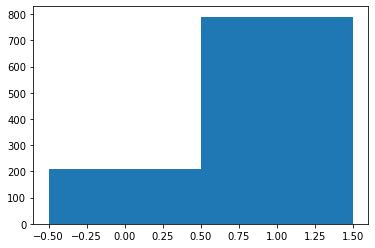

In [19]:
plt.hist(coin_toss, bins = [-0.5,0.5,1.5])
plt.show()

Plot a density histogram of 10000 outcomes. You will get the Bernoulli distribution having parameter $p$: https://en.wikipedia.org/wiki/Bernoulli_distribution (the outcome of coin tossing is a Bernoulli stochastic variable).

Hint: You have only two values on the x-asis. If you let python doing the histogram using the default generation of bins it can make a mess. Instead specify the bin boundaries using the argument `bins=[-0.5,0.5,1.5]`.

## 2 - Computing the observable average genereting the whole sequence

To solve the exercise stated at the beginning, we need to compute the avearge of the observable, which is the amount of money that I'm going to win or loose:

$$
A \left(\vec{X}_{1}, \vec{X}_{2} \right) = \text{N. heads}\left[\vec{X}_{1}\right] - \text{N. heads}\left[\vec{X}_{2}\right]
$$

where $\vec{X}_{i} = (X_i^{(1)}, \ldots, X_{i}^{(n_i)})$ is the sequence of the coin outcomes for the player $i$ ($X$ is a Bernoulli variable with probability $p_i$ of obtaining head). ((Remember that player $1$ plays $10$ times and player $2$ only $6$, so $|\vec{X}_{1}| = 10$ and $|\vec{X}_{2}| = 6$))

The average of the observable is defined as:

$$
\langle A \rangle = \sum_{\vec{x}_{1}} \sum_{\vec{x}_{2}} P(\vec{x}_1) P(\vec{x}_2) A(\vec{x}_1, \vec{x}_2)
$$

Note that the two sequences are independent, and this allows us to factorize the probabilitiy $P(\vec{x}_1, \vec{x}_2)$.

The Montecarlo method that we are using to approximate that summation takes advantage of the sample average (the sample is one extaction of $\vec{X}_1$ and $\vec{X}_2$), that, in the limit of infinite samples, converges to the real average:

$$
\langle A \rangle = \lim_{N \rightarrow \infty} \frac{1}{N} \sum_{i}^N A\left(\vec{X}_1, \vec{X}_2\right)
$$


### 2a - Write a function that provides one sample of $A$

First write a function that, given two sequences, computes the observable $A$. 

In [56]:
def compute_A1(seq1, seq2):
    return sum(seq1) - sum(seq2)

In [57]:
seq1 = [0,1,1,1,0]
seq2 = [0,0,0,0]
compute_A1(seq1, seq2)

3

Then, write another function that, given the four parameter of the game, $n_1$, $n_2$, $p_1$, $p_2$, generates the two sequences of outcomes and returns how much money I won, which is $A$. 

In [58]:
def compute_A(n1, n2, p1, p2):
    seq1 = coin_tossing(n1, p1)
    seq2 = coin_tossing(n2, p2)
    return sum(seq1) - sum(seq2)

In [59]:
compute_A(10, 6, 0.5, 0.75)

-2

### 2b - Compute the average of A and answer the exercise question

Write a function that computes the sample average over $N=10000$ samples. This means that you have to generate $N$ pair of sequences $X_1$ and $X_2$, compute $A$, summing those values and divide by $N$.

In [83]:
def average_A(N, n1, n2, p1, p2):
    A_list = []
    for i in range(N):
        seq1 = coin_tossing(n1, p1)
        seq2 = coin_tossing(n2, p2)
        A = sum(seq1) - sum(seq2)
        A_list.append(A)
    return sum(A_list) / N

In [84]:
average_A(10, 10, 6, 0.5, 0.75)

-0.6

In [ ]:
def average_A2(N, n1, n2, p1, p2):
    seq1 = np.random.rand(N, n1)
    seq2 = np.random.rand(N, n2)
    heads1 = np.sum(seq1 > p1, axis = 1)
    heads2 = np.sum(seq2 > p2, axis = 1)
    win = heads1 - heads2
    return np.mean(win)

## 3 - Statistics of the number of heads

To solve the exercise in a smarter way, let's study the statistics of the number of heads in a sequence.

Given an ensemble of $R$ sequences, compute the number of heads in each of them, and store all these numbers in a $R$-long vector.

Plot the density histogram of the vector of number of heads. You will get the Binomial distribution: https://en.wikipedia.org/wiki/Binomial_distribution.

$$
p(h | p, n) = \frac{n!}{(n-h)!h!} p^h (1-p)^{n-h}
$$

Try to plot this function on the top of your histogram, anc check that they overlap.

Be careful about the binomial coefficient $\frac{n!}{(n-h)!h!} = \binom{n}{h}$, since the factorial explodes also for small $n$. I suggest you to use the python function written in the box below to generate the coefficient. It will take care of approximating large numbers.

In [ ]:
from scipy.special import binom # binom(n,h) returns the binomial coefficient n over h

## 4 - Compute the average in a smarter way: sampling from the binomial distribution

A smart reader can note that the observable depends only on the number of heads of the two sequences: $A(\vec{X}_1, \vec{X}_1) = A\left(H_1, H_2 \right)$.
Moreover we do know the statistics of the number of heads: it's a binomial as we tested before.
From this observation we can forget that there is an underlying sequence of coin outcomes (which we can generate using $n_1 + n_2$ random-numbers) and directly sample the number of heads from the binomial distribution (using only two random-number generations).

In formulas:
$$
\langle A \rangle = \sum_{h_1} \sum_{h_2} P(h_1 | p_1, n_1) P(h_2 | p_2, n_2) A(h_1, h_2) = \lim_{N \rightarrow \infty} \frac{1}{N} \sum_{i}^N A\left(H_1, H_2\right)
$$



### 4a - Sampling from the binomial distribution

To sample discrete distributions we need the cumulative $C(h) = \sum_{i=0}^h p(i)$.

Write a function that given the two parameters of the binomial distribution, $p$ and $n$, returns a vector containing all the values of the cumulative: $C(0), C(1), \ldots, C(n)$.

Write in a function the generator of one sample the binomial distribution. This function takes as argument the cumulative distribution of the binomial that we want to sample.
- Generate a uniform sample $U$ in $[0,1]$
- Iterate $i$ in $0, \ldots, n$:
> - If $C_{i} < U < C_{i+1}$: return $i$.

### 4b - Test your generator

Test your generator by obtaining $10000$ samples, plt the density histogram and test the correspondence with the theorietical distribution.

### 4c - Compute the average sampling from the binomial

As before, compute the average of $A(h_1,h_2) = h_1-h_2$.

- Generate the two cumulative distributions (according to the parameters of the two sequences of the two players).
- Iterate over $R$ realization:
> - Generate the number of heads in the first sequence.
> - Generate the number of heads in the second sequence.
> - Compute $A$ and store this sample in a vecotor.
- Compute the average of the vector containing the samples of $A$.


### 4d Extra - Test that the average A depends only on the product $np$

If you change, for example, $p_2$ and $n_2$ in a way that $p_2 n_2$ is constant, the outcome does not change (the only relenvant variable is $p_2 n_2$). 
Try to show this fact in a plot.

What is the theoretical reason behind this?